In [116]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [117]:
# Define maps and positions
map = {'map_0':'data/map0.png', 'map_1':'data/map1.png', 'map_2':'data/map2.png', 'map_3':'data/map3.png'}
starting_point = {'map_0': [10, 10], 'map_1': [60, 60], 'map_2': [8, 31], 'map_3': [50, 90]}
goal_point = {'map_0_first_position': [110, 40], 'map_0_second_position': [90, 70], 'map_1': [90, 60], 'map_2': [139, 38], 'map_3': [375, 375]}

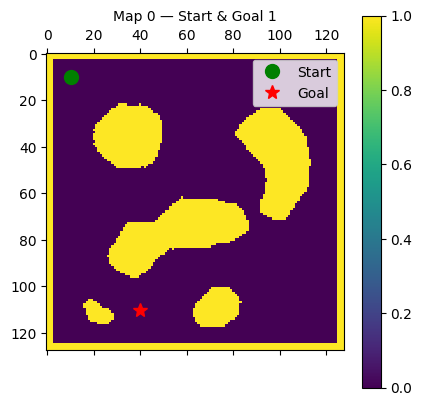

In [118]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Load grid map
image = Image.open(map[map_name]).convert('L')
grid_map_0_first = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255
# binarize the image
grid_map_0_first[grid_map_0_first > 0.5] = 1
grid_map_0_first[grid_map_0_first <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map_0_first = (grid_map_0_first * -1) + 1
# Show grid map
plt.matshow(grid_map_0_first)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Map 0 — Start & Goal 1', size = 10)
plt.colorbar()
plt.legend()
plt.show()

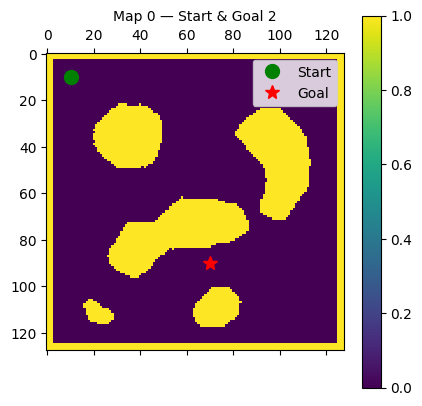

In [119]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Load grid map
image = Image.open(map[map_name]).convert('L')
grid_map_0_second = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255
# binarize the image
grid_map_0_second[grid_map_0_second > 0.5] = 1
grid_map_0_second[grid_map_0_second <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map_0_second = (grid_map_0_second * -1) + 1
# Show grid map
plt.matshow(grid_map_0_second)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Map 0 — Start & Goal 2', size = 10)
plt.colorbar()
plt.legend()
plt.show()

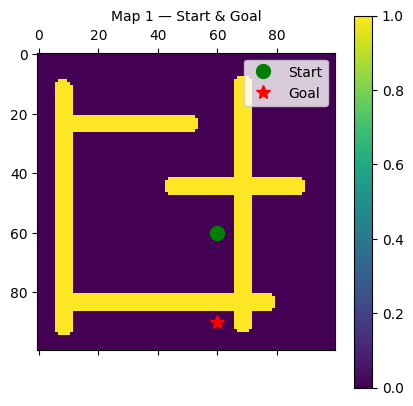

In [120]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Load grid map
image = Image.open(map[map_name]).convert('L')
grid_map_1 = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255
# binarize the image
grid_map_1[grid_map_1 > 0.5] = 1
grid_map_1[grid_map_1 <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map_1 = (grid_map_1 * -1) + 1
# Show grid map
plt.matshow(grid_map_1)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Map 1 — Start & Goal', size = 10)
plt.colorbar()
plt.legend()
plt.show()

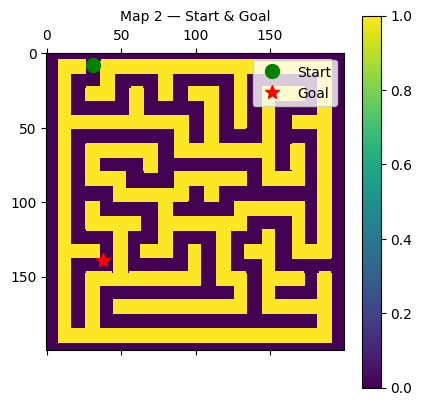

In [121]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Load grid map
image = Image.open(map[map_name]).convert('L')
grid_map_2 = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255
# binarize the image
grid_map_2[grid_map_2 > 0.5] = 1
grid_map_2[grid_map_2 <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map_2 = (grid_map_2 * -1) + 1
# Show grid map
plt.matshow(grid_map_2)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Map 2 — Start & Goal', size = 10)
plt.colorbar()
plt.legend()
plt.show()

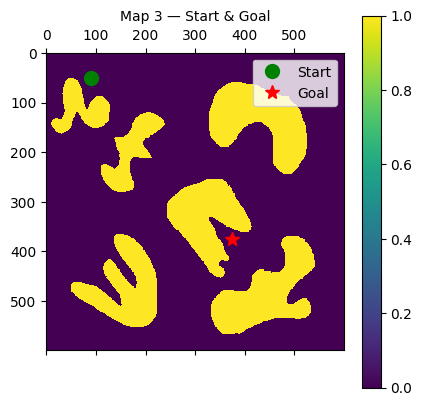

In [122]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Load grid map
image = Image.open(map[map_name]).convert('L')
grid_map_3 = np.array(image.getdata()).reshape(image.size[0], image.size[1])/255
# binarize the image
grid_map_3[grid_map_3 > 0.5] = 1
grid_map_3[grid_map_3 <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map_3 = (grid_map_3 * -1) + 1
# Show grid map
plt.matshow(grid_map_3)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Map 3 — Start & Goal', size = 10)
plt.colorbar()
plt.legend()
plt.show()

# Exercise 1: Attraction function: Quadratic Potential Function

In [123]:
def Euclidean_distance(point1, point2):
    # Calculate Euclidean distance between two points
    dist = np.sqrt(np.square(point1[0]- point2[0]) + np.square(point1[1]- point2[1]))
    return dist

def Manhatan_distance(point1, point2):
    # Calculate Manhattan distance between two points
    dist = np.abs(point1[0] - point2[0]) + np.abs(point1[1] - point2[1])
    return dist

def attraction_potential_function(grid_map, goal_point, scaling_factor, mode):
    ## Input:
    # grid_map: 2D numpy array representing the grid map
    # goal_point: list or array representing the goal point coordinates [x, y]
    # scaling_factor: float value to scale the potential
    # mode: string indicating the method to compute the attraction potential ('Euclidean_distance', 'Manhatan_distance', '4_point', '8_point')
    ## Output:
    # grid_map: 2D numpy array representing the attraction potential map

    goal = np.array([goal_point[0], goal_point[1]])
    grid_map[:][:] = 0

    if mode in ['Euclidean_distance', 'Manhatan_distance']:
        if mode == 'Euclidean_distance':
            for i, j in np.ndindex(grid_map.shape):
                grid_map[i][j] = 1/2 * scaling_factor * (Euclidean_distance([i, j], goal) ** 2)

            return grid_map
    
        elif mode == 'Manhatan_distance':
            for i, j in np.ndindex(grid_map.shape):
                grid_map[i][j] = 1/2 * scaling_factor * (Manhatan_distance([i, j], goal) ** 2)

            return grid_map
    
    else:
        move_type = []
        grid_map[goal[0]][goal[1]] = 1
        L = [[goal[0], goal[1]]]

        if mode == '4_point':
            move_type = [[-1, 0], [0, -1], [1, 0], [0, 1]]

        elif mode == '8_point':
            move_type = [[-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0], [1, 1], [0, 1], [-1, 1]]

        while len(L) != 0:
            t = L.pop(0)
            for move in move_type:
                if ((t[0] + move[0] >= grid_map.shape[0]) or (t[1] + move[1] >= grid_map.shape[1]) or (t[1] + move[1] < 0) or (t[0] + move[0] < 0)):
                    continue
                else:
                    if (grid_map[t[0] + move[0]][t[1] + move[1]] == 0):
                        grid_map[t[0] + move[0]][t[1] + move[1]] = grid_map[t[0], t[1]] + 1
                        L.append([t[0] + move[0], t[1] + move[1]])

        grid_map[:][:] = grid_map[:][:] - 1

        for i, j in np.ndindex(grid_map.shape):
            grid_map[i][j] = 1/2 * scaling_factor * (grid_map[i][j] ** 2)

        return grid_map

#### Map 0 with first goal position

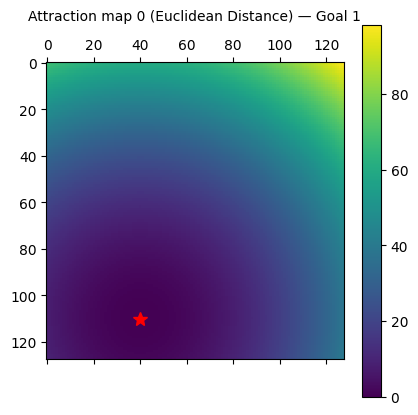

In [124]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Compute attraction potential map using Euclidean distance
attraction_grid_map_0_Euclidean_goal_1 = attraction_potential_function(grid_map_0_first.copy(), goal, scaling_factor=0.01, mode='Euclidean_distance')

# Show grid map
plt.matshow(attraction_grid_map_0_Euclidean_goal_1)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Attraction map 0 (Euclidean Distance) — Goal 1', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 0 with second goal position

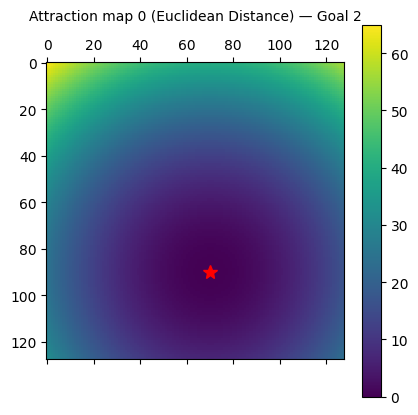

In [125]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Compute attraction potential map using Euclidean distance
attraction_grid_map_0_Euclidean_goal_2 = attraction_potential_function(grid_map_0_second.copy(), goal, scaling_factor=0.01, mode='Euclidean_distance')

# Show grid map
plt.matshow(attraction_grid_map_0_Euclidean_goal_2)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Attraction map 0 (Euclidean Distance) — Goal 2', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 1 with goal position

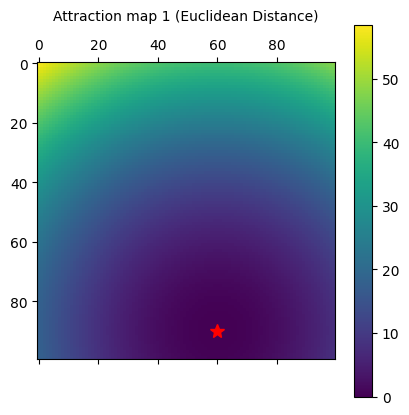

In [126]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute attraction potential map using Euclidean distance
attraction_grid_map_1_Euclidean = attraction_potential_function(grid_map_1.copy(), goal, scaling_factor=0.01, mode='Euclidean_distance')

# Show grid map
plt.matshow(attraction_grid_map_1_Euclidean)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Attraction map 1 (Euclidean Distance)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 2 with goal position

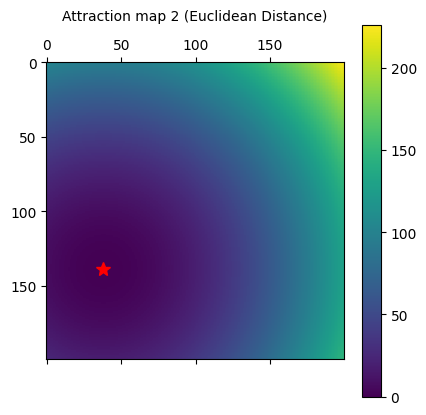

In [127]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute attraction potential map using Euclidean distance
attraction_grid_map_2_Euclidean = attraction_potential_function(grid_map_2.copy(), goal, scaling_factor=0.01, mode='Euclidean_distance')

# Show grid map
plt.matshow(attraction_grid_map_2_Euclidean)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Attraction map 2 (Euclidean Distance)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 3 with goal position

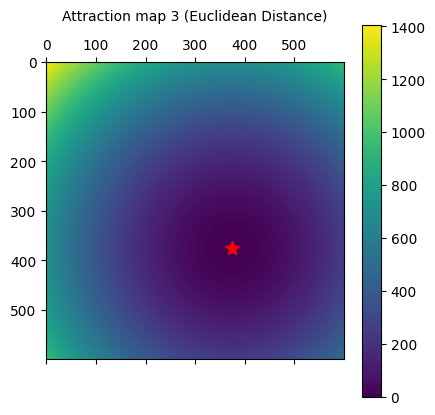

In [128]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute attraction potential map using Euclidean distance
attraction_grid_map_3_Euclidean = attraction_potential_function(grid_map_3.copy(), goal, scaling_factor=0.01, mode='Euclidean_distance')

# Show grid map
plt.matshow(attraction_grid_map_3_Euclidean)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Attraction map 3 (Euclidean Distance)', size = 10, pad=30)
plt.colorbar()
plt.show()

# Exercise 2: Distance to nearest obstacle

In [129]:
def distance_to_nearest_obstacle(grid_map, mode):
    ## Input:
    # grid_map: 2D numpy array representing the binary occupancy grid map (0 -> free, 1 -> occupied)
    # mode: string indicating the method to compute the distance ('4_point', '8_point')
    ## Output:
    # grid_map: 2D numpy array representing the distance to nearest obstacle map
    L = []

    for i,j in np.ndindex(grid_map.shape):
        if grid_map[i][j] == 1:
            L.append([i, j])
    
    if mode == '4_point':
        move_type = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    elif mode == '8_point':
        move_type = [[-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0], [1, 1], [0, 1], [-1, 1]]
    while len(L) != 0:
        t = L.pop(0)
        for move in move_type:
            if ((t[0] + move[0] >= grid_map.shape[0]) or (t[1] + move[1] >= grid_map.shape[1]) or (t[1] + move[1] < 0) or (t[0] + move[0] < 0)):
                continue
            else:
                if (grid_map[t[0] + move[0]][t[1] + move[1]] == 0):
                    grid_map[t[0] + move[0]][t[1] + move[1]] = grid_map[t[0], t[1]] + 1
                    L.append([t[0] + move[0], t[1] + move[1]])
    grid_map[:][:] = grid_map[:][:] - 1
    
    return grid_map

#### Map 0

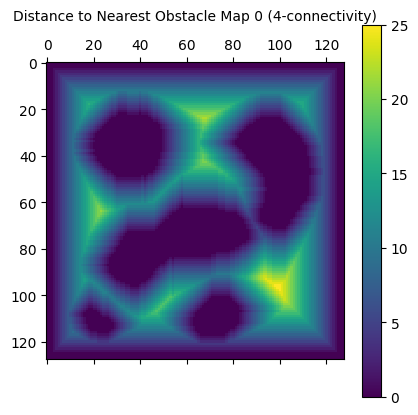

In [130]:
# Compute distance to nearest obstacle map using 4-connectivity
map_0_dist_nearest_obs_4_conn = distance_to_nearest_obstacle(grid_map_0_first.copy(), '4_point')

# Show grid map
plt.matshow(map_0_dist_nearest_obs_4_conn)
plt.title('Distance to Nearest Obstacle Map 0 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()


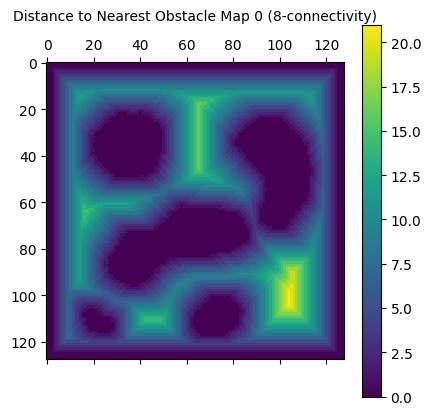

In [131]:
# Compute distance to nearest obstacle map using 8-connectivity
map_0_dist_nearest_obs_8_conn = distance_to_nearest_obstacle(grid_map_0_first.copy(), '8_point')

# Show grid map
plt.matshow(map_0_dist_nearest_obs_8_conn)
plt.title('Distance to Nearest Obstacle Map 0 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 1

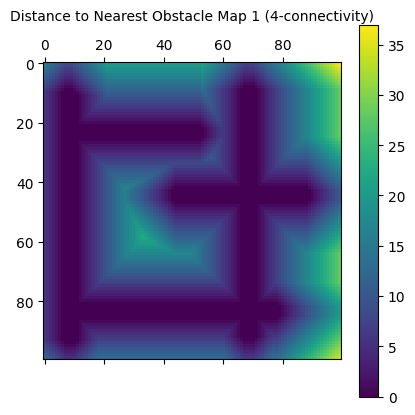

In [132]:
# Compute distance to nearest obstacle map using 4-connectivity
map_1_dist_nearest_obs_4_conn = distance_to_nearest_obstacle(grid_map_1.copy(), '4_point')

# Show grid map
plt.matshow(map_1_dist_nearest_obs_4_conn)
plt.title('Distance to Nearest Obstacle Map 1 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

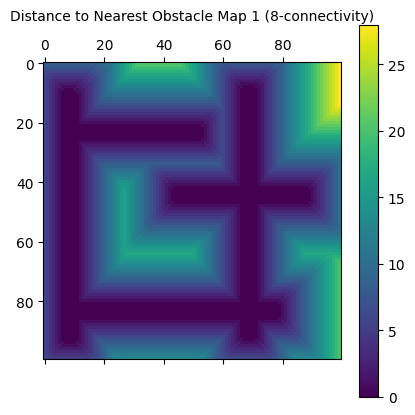

In [133]:
# Compute distance to nearest obstacle map using 8-connectivity
map_1_dist_nearest_obs_8_conn = distance_to_nearest_obstacle(grid_map_1.copy(), '8_point')

# Show grid map
plt.matshow(map_1_dist_nearest_obs_8_conn)
plt.title('Distance to Nearest Obstacle Map 1 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 2

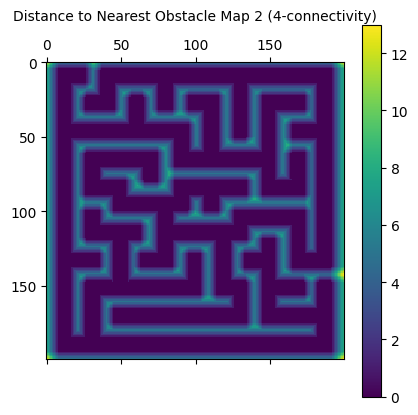

In [134]:
# Compute distance to nearest obstacle map using 4-connectivity
map_2_dist_nearest_obs_4_conn = distance_to_nearest_obstacle(grid_map_2.copy(), '4_point')

# Show grid map
plt.matshow(map_2_dist_nearest_obs_4_conn)
plt.title('Distance to Nearest Obstacle Map 2 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

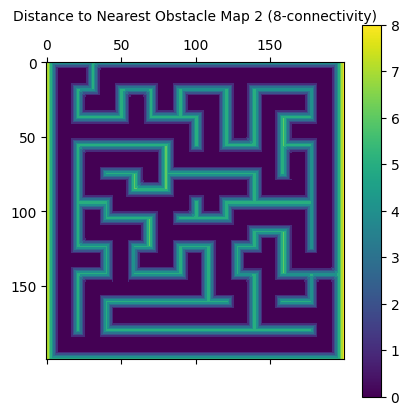

In [135]:
# Compute distance to nearest obstacle map using 8-connectivity
map_2_dist_nearest_obs_8_conn = distance_to_nearest_obstacle(grid_map_2.copy(), '8_point')

# Show grid map
plt.matshow(map_2_dist_nearest_obs_8_conn)
plt.title('Distance to Nearest Obstacle Map 2 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 3

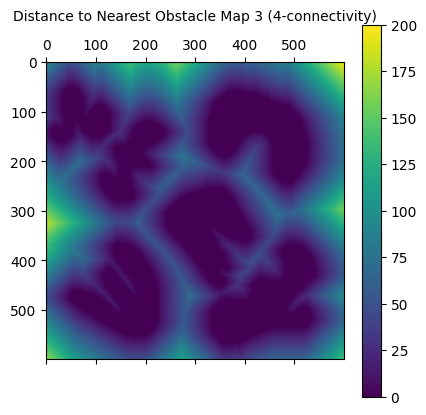

In [136]:
# Compute distance to nearest obstacle map using 4-connectivity
map_3_dist_nearest_obs_4_conn = distance_to_nearest_obstacle(grid_map_3.copy(), '4_point')

# Show grid map
plt.matshow(map_3_dist_nearest_obs_4_conn)
plt.title('Distance to Nearest Obstacle Map 3 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

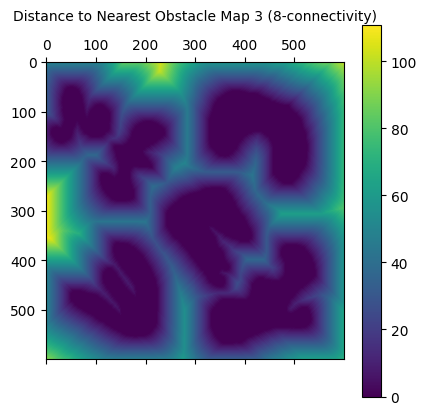

In [137]:
# Compute distance to nearest obstacle map using 8-connectivity
map_3_dist_nearest_obs_8_conn = distance_to_nearest_obstacle(grid_map_3.copy(), '8_point')

# Show grid map
plt.matshow(map_3_dist_nearest_obs_8_conn)
plt.title('Distance to Nearest Obstacle Map 3 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

# Exercise 3: Repulsive function

In [138]:
def repulsive_function(grid_map, Q_value, scaling_factor):
    ## Input:
    # grid_map: 2D numpy array representing the distance to nearest obstacle map
    # Q_value: float value representing the influence distance of obstacles
    # scaling_factor: float value to scale the potential
    ## Output:
    # grid_map: 2D numpy array representing the repulsive potential map
    
    for i,j in np.ndindex(grid_map.shape):
        if grid_map[i][j] <= Q_value:
            grid_map[i][j] = 1/2 * scaling_factor * np.square(1/grid_map[i][j] - 1/Q_value)
        elif grid_map[i][j] > Q_value:
            grid_map[i][j] = 0

    return grid_map

#### Map 0

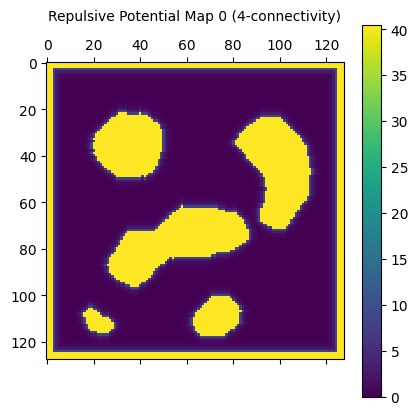

In [139]:
# Compute repulsive potential map
grid_map_0_repulsive_4_conn = repulsive_function(map_0_dist_nearest_obs_4_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_0_repulsive_4_conn)
plt.title('Repulsive Potential Map 0 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

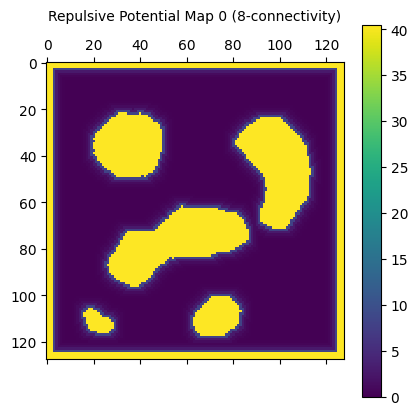

In [140]:
# Compute repulsive potential map
grid_map_0_repulsive_8_conn = repulsive_function(map_0_dist_nearest_obs_8_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_0_repulsive_8_conn)
plt.title('Repulsive Potential Map 0 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 1

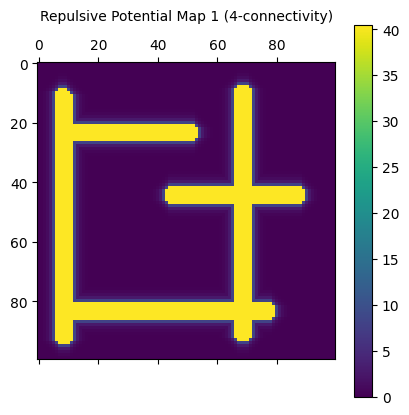

In [141]:
# Compute repulsive potential map
grid_map_1_repulsive_4_conn = repulsive_function(map_1_dist_nearest_obs_4_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_1_repulsive_4_conn)
plt.title('Repulsive Potential Map 1 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

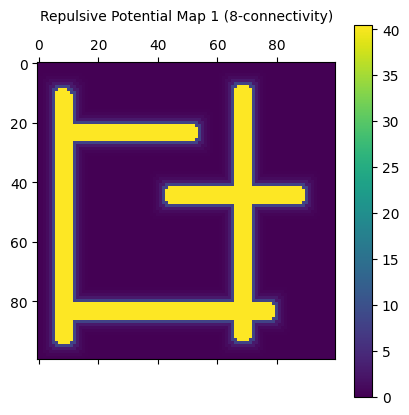

In [142]:
# Compute repulsive potential map
grid_map_1_repulsive_8_conn = repulsive_function(map_1_dist_nearest_obs_8_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_1_repulsive_8_conn)
plt.title('Repulsive Potential Map 1 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 2

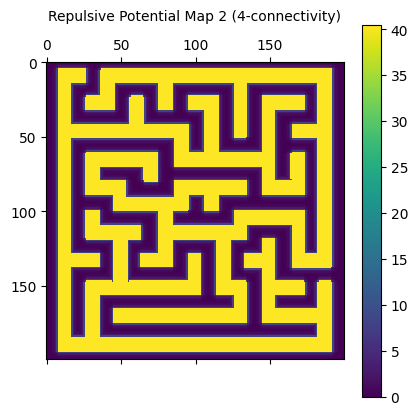

In [143]:
# Compute repulsive potential map
grid_map_2_repulsive_4_conn = repulsive_function(map_2_dist_nearest_obs_4_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_2_repulsive_4_conn)
plt.title('Repulsive Potential Map 2 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

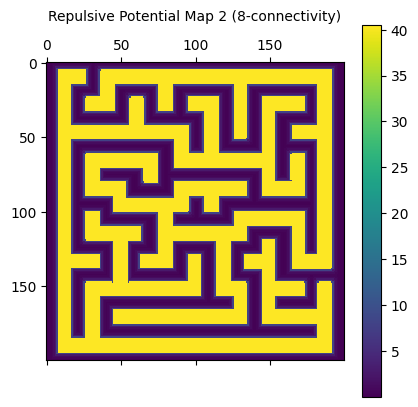

In [144]:
# Compute repulsive potential map
grid_map_2_repulsive_8_conn = repulsive_function(map_2_dist_nearest_obs_8_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_2_repulsive_8_conn)
plt.title('Repulsive Potential Map 2 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 3

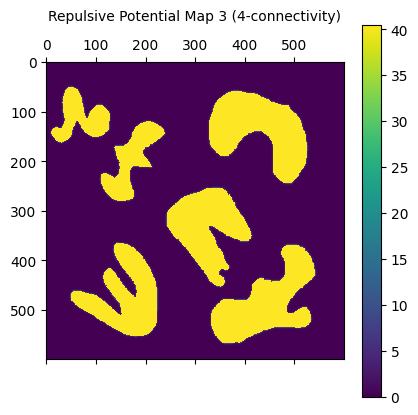

In [145]:
# Compute repulsive potential map
grid_map_3_repulsive_4_conn = repulsive_function(map_3_dist_nearest_obs_4_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_3_repulsive_4_conn)
plt.title('Repulsive Potential Map 3 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

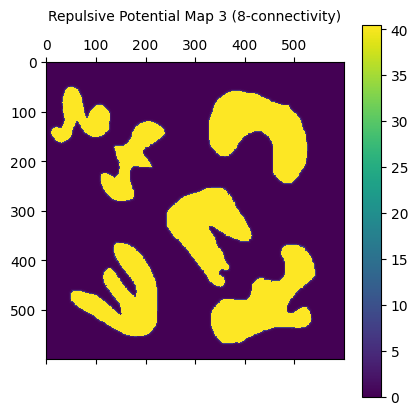

In [146]:
# Compute repulsive potential map
grid_map_3_repulsive_8_conn = repulsive_function(map_3_dist_nearest_obs_8_conn.copy() + 1, 10, 100)

# Show grid map
plt.matshow(grid_map_3_repulsive_8_conn)
plt.title('Repulsive Potential Map 3 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

# Exercise 4: Total potential function

#### Map 0 with first goal position

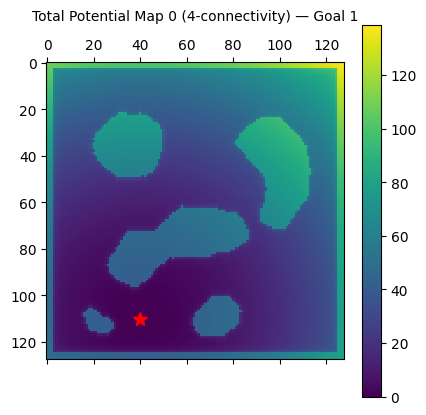

In [147]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Compute total potential function
map_0_goal_1_total_potential_grid_4_conn = attraction_grid_map_0_Euclidean_goal_1.copy() + grid_map_0_repulsive_4_conn.copy()

# Show grid map
plt.matshow(map_0_goal_1_total_potential_grid_4_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 0 (4-connectivity) — Goal 1', size = 10, pad=30)
plt.colorbar()
plt.show()


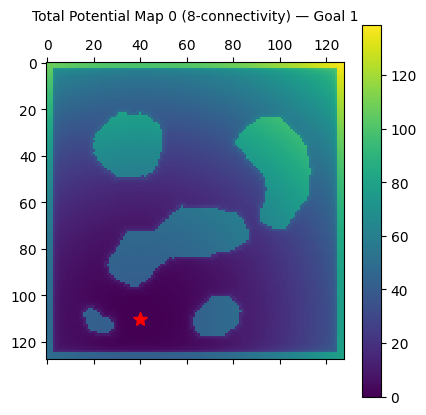

In [148]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Compute total potential function
map_0_goal_1_total_potential_grid_8_conn = attraction_grid_map_0_Euclidean_goal_1.copy() + grid_map_0_repulsive_8_conn.copy()

# Show grid map
plt.matshow(map_0_goal_1_total_potential_grid_8_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 0 (8-connectivity) — Goal 1', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 0 with second goal position

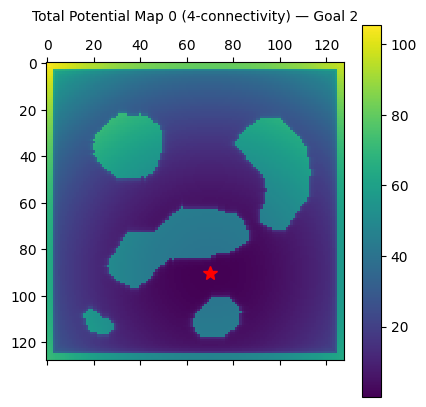

In [149]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Compute total potential function
map_0_goal_2_total_potential_grid_4_conn = attraction_grid_map_0_Euclidean_goal_2.copy() + grid_map_0_repulsive_4_conn.copy()

# Show grid map
plt.matshow(map_0_goal_2_total_potential_grid_4_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 0 (4-connectivity) — Goal 2', size = 10, pad=30)
plt.colorbar()
plt.show()

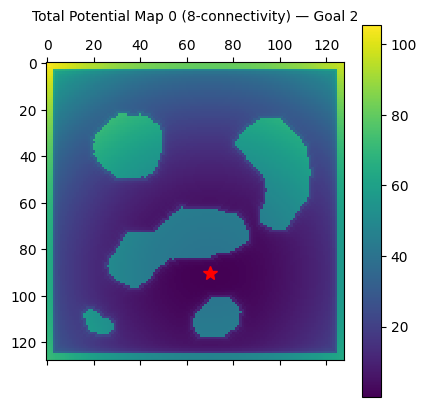

In [150]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Compute total potential function
map_0_goal_2_total_potential_grid_8_conn = attraction_grid_map_0_Euclidean_goal_2.copy() + grid_map_0_repulsive_8_conn.copy()

# Show grid map
plt.matshow(map_0_goal_2_total_potential_grid_8_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 0 (8-connectivity) — Goal 2', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 1

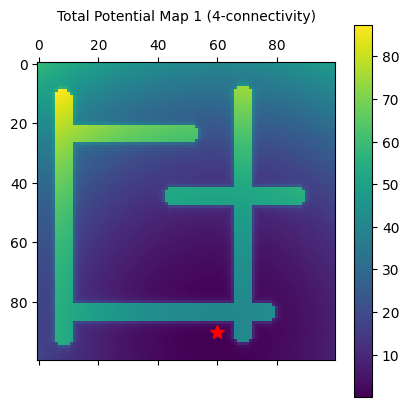

In [151]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute total potential function
map_1_total_potential_grid_4_conn = attraction_grid_map_1_Euclidean.copy() + grid_map_1_repulsive_4_conn.copy()

# Show grid map
plt.matshow(map_1_total_potential_grid_4_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 1 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

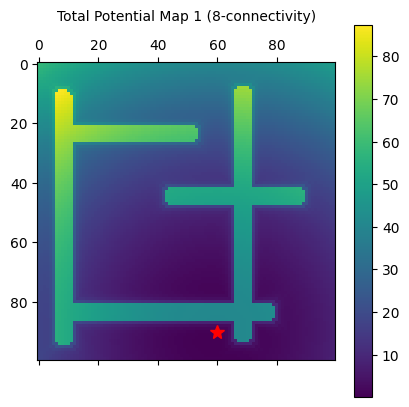

In [152]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute total potential function
map_1_total_potential_grid_8_conn = attraction_grid_map_1_Euclidean.copy() + grid_map_1_repulsive_8_conn.copy()

# Show grid map
plt.matshow(map_1_total_potential_grid_8_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 1 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 2

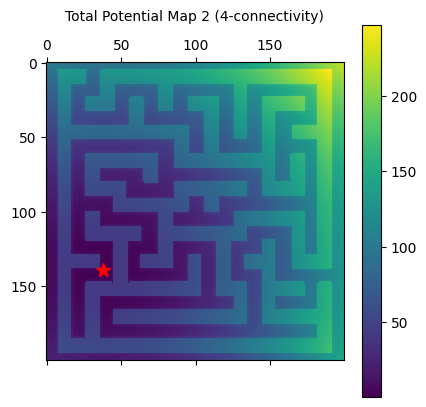

In [153]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute total potential function
map_2_total_potential_grid_4_conn = attraction_grid_map_2_Euclidean.copy() + grid_map_2_repulsive_4_conn.copy()

# Show grid map
plt.matshow(map_2_total_potential_grid_4_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 2 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

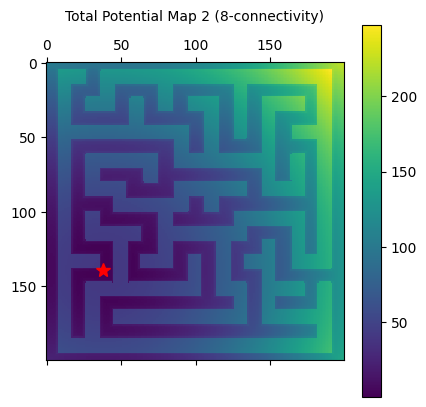

In [154]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute total potential function
map_2_total_potential_grid_8_conn = attraction_grid_map_2_Euclidean.copy() + grid_map_2_repulsive_8_conn.copy()

# Show grid map
plt.matshow(map_2_total_potential_grid_8_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 2 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

#### Map 3

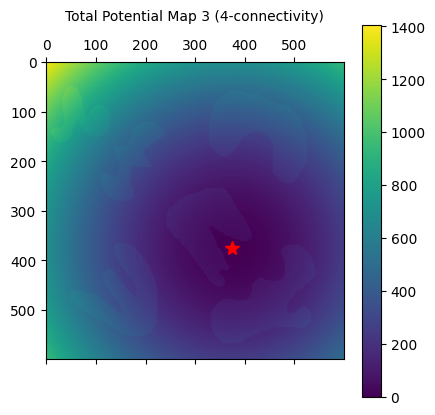

In [155]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute total potential function
map_3_total_potential_grid_4_conn = attraction_grid_map_3_Euclidean.copy() + grid_map_3_repulsive_4_conn.copy()

# Show grid map
plt.matshow(map_3_total_potential_grid_4_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 3 (4-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

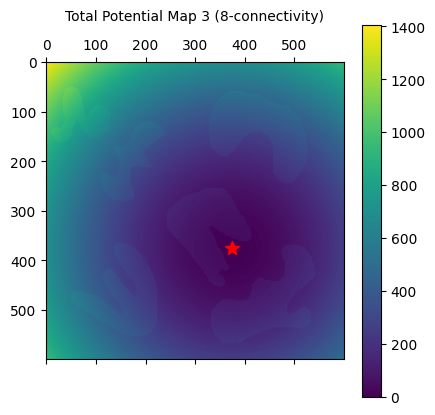

In [156]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Compute total potential function
map_3_total_potential_grid_8_conn = attraction_grid_map_3_Euclidean.copy() + grid_map_3_repulsive_8_conn.copy()

# Show grid map
plt.matshow(map_3_total_potential_grid_8_conn)
plt.plot(goal[1], goal[0], 'r*', markersize = 10)
plt.title('Total Potential Map 3 (8-connectivity)', size = 10, pad=30)
plt.colorbar()
plt.show()

# Exercise 5: Gradient descent

In [157]:
def gradient_descent_one_step(total_potential_grid_map, current, mode):
    ## Input:
    # total_potential_grid_map: 2D numpy array representing the total potential map
    # current: list or array representing the current point coordinates [x, y]
    # mode: string indicating the method to compute the gradient descent step ('4_point', '8_point')
    ## Output:
    # next_point: array representing the next point coordinates [x, y]

    if mode == '4_point':
        move_type = [[0, 0], [0, 1], [-1, 0], [1, 0], [0, -1]]
    elif mode == '8_point':
        move_type = [[0, 0], [-1, -1], [-1, 0], [0, -1], [1, 0], [0, 1], [1, -1], [1, 1], [-1, 1]]

    list_diff_potential = []
    for move in move_type:
        diff_potential = total_potential_grid_map[current[0] + move[0], current[1] + move[1]] - total_potential_grid_map[current[0], current[1]]
        list_diff_potential.append(diff_potential)
    
    gradient_direction = min(zip(list_diff_potential, move_type))[1]
    next_point = np.array([current[0] + gradient_direction[0], current[1] + gradient_direction[1]])
    return next_point

def gradient_loop(total_potential_grid_map, start, goal, mode, num_iters):
    ## Input:
    # total_potential_grid_map: 2D numpy array representing the total potential map
    # start: list or array representing the start point coordinates [x, y]
    # goal: list or array representing the goal point coordinates [x, y]
    # mode: string indicating the method to compute the gradient descent step ('4_point', '8_point')
    # num_iters: integer representing the maximum number of iterations
    ## Output:
    # trajectory_x: list of x coordinates representing the trajectory
    # trajectory_y: list of y coordinates representing the trajectory
    
    current = start
    count = 0
    trajectory_x = []
    trajectory_y = []
    trajectory_x.append(int(current[0]))
    trajectory_y.append(int(current[1]))
    while (count < num_iters):
        if (current[0] == goal[0] and current[1] == goal[1]):
            break
        current = gradient_descent_one_step(total_potential_grid_map, current, mode)
        count += 1
        trajectory_x.append(int(current[0]))
        trajectory_y.append(int(current[1]))


    return trajectory_x, trajectory_y

#### Map 0 with first goal position

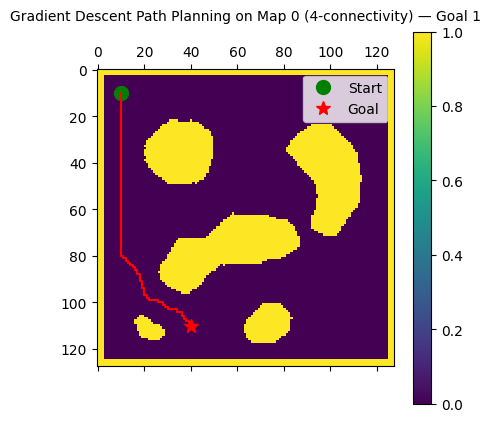

In [158]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Gradient descent path planning
map_0_goal_1_trajectory_x_4_conn, map_0_goal_1_trajectory_y_4_conn = gradient_loop(map_0_goal_1_total_potential_grid_8_conn.copy(), start, goal, mode="4_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_0_first)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_1_trajectory_y_4_conn, map_0_goal_1_trajectory_x_4_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 0 (4-connectivity) — Goal 1', size = 10, pad=35)
plt.legend()
plt.colorbar()
plt.show()

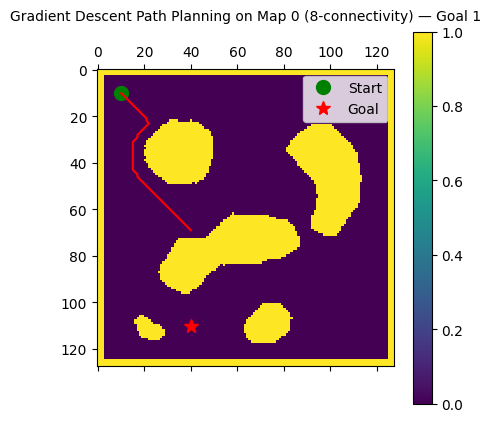

In [159]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Gradient descent path planning
map_0_goal_1_trajectory_x_8_conn, map_0_goal_1_trajectory_y_8_conn = gradient_loop(map_0_goal_1_total_potential_grid_8_conn.copy(), start, goal, mode="8_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_0_first)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_1_trajectory_y_8_conn, map_0_goal_1_trajectory_x_8_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 0 (8-connectivity) — Goal 1', size = 10, pad=35)
plt.legend()
plt.colorbar()
plt.show()

#### Map 0 with second goal position

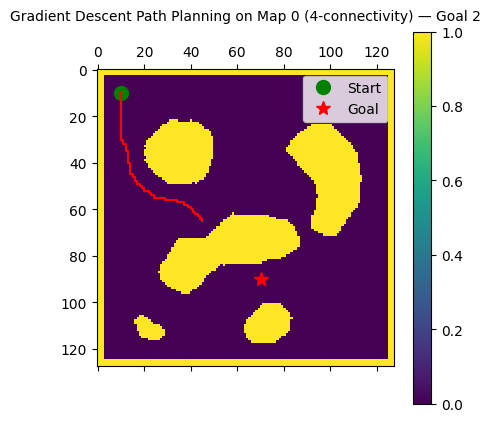

In [160]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Gradient descent path planning
map_0_goal_2_trajectory_x_4_conn, map_0_goal_2_trajectory_y_4_conn = gradient_loop(map_0_goal_2_total_potential_grid_8_conn.copy(), start, goal, mode="4_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_0_first)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_2_trajectory_y_4_conn, map_0_goal_2_trajectory_x_4_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 0 (4-connectivity) — Goal 2', size = 10, pad=35)
plt.legend()
plt.colorbar()
plt.show()

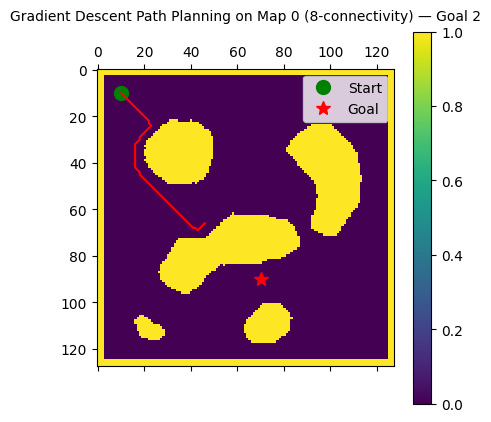

In [161]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Gradient descent path planning
map_0_goal_2_trajectory_x_8_conn, map_0_goal_2_trajectory_y_8_conn = gradient_loop(map_0_goal_2_total_potential_grid_8_conn.copy(), start, goal, mode="8_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_0_first)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_2_trajectory_y_8_conn, map_0_goal_2_trajectory_x_8_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 0 (8-connectivity) — Goal 2', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 1

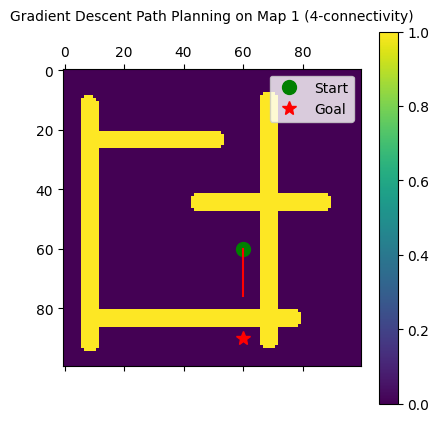

In [162]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Gradient descent path planning
map_1_trajectory_x_4_conn, map_1_trajectory_y_4_conn = gradient_loop(map_1_total_potential_grid_4_conn.copy(), start, goal, mode="4_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_1)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_1_trajectory_y_4_conn, map_1_trajectory_x_4_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 1 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

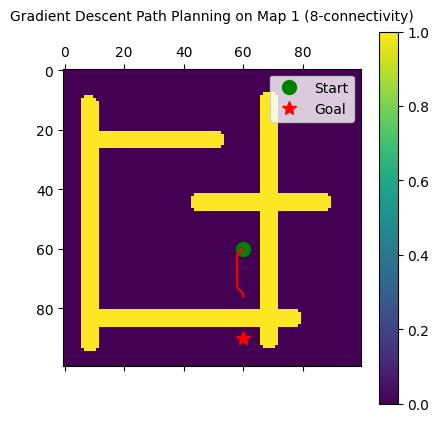

In [163]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Gradient descent path planning
map_1_trajectory_x_8_conn, map_1_trajectory_y_8_conn = gradient_loop(map_1_total_potential_grid_8_conn.copy(), start, goal, mode="8_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_1)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_1_trajectory_y_8_conn, map_1_trajectory_x_8_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 1 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 2

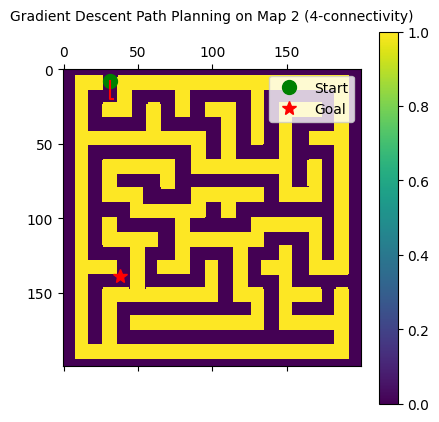

In [164]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Gradient descent path planning
map_2_trajectory_x_4_conn, map_2_trajectory_y_4_conn = gradient_loop(map_2_total_potential_grid_4_conn.copy(), start, goal, mode="4_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_2)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_2_trajectory_y_4_conn, map_2_trajectory_x_4_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 2 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

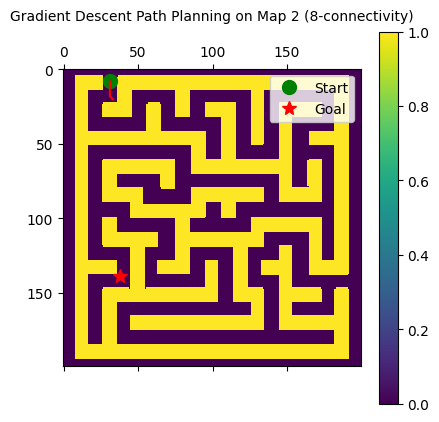

In [165]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Gradient descent path planning
map_2_trajectory_x_8_conn, map_2_trajectory_y_8_conn = gradient_loop(map_2_total_potential_grid_8_conn.copy(), start, goal, mode="8_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_2)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_2_trajectory_y_8_conn, map_2_trajectory_x_8_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 2 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 3

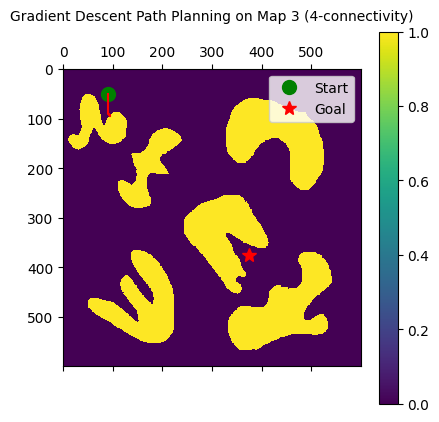

In [166]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Gradient descent path planning
map_3_trajectory_x_4_conn, map_3_trajectory_y_4_conn = gradient_loop(map_3_total_potential_grid_4_conn.copy(), start, goal, mode="4_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_3)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_3_trajectory_y_4_conn, map_3_trajectory_x_4_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 3 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

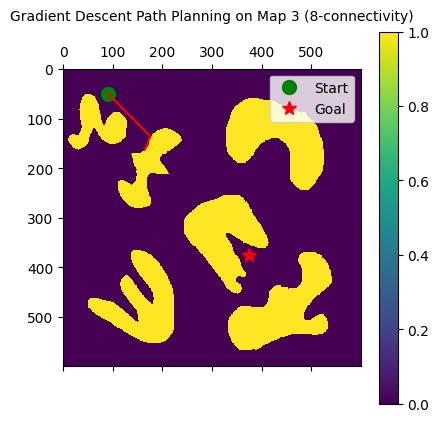

In [167]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Gradient descent path planning
map_3_trajectory_x_8_conn, map_3_trajectory_y_8_conn = gradient_loop(map_3_total_potential_grid_8_conn.copy(), start, goal, mode="8_point", num_iters=1000)

# Show grid map with trajectory
plt.matshow(grid_map_3)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_3_trajectory_y_8_conn, map_3_trajectory_x_8_conn, 'r-', markersize = 10)
plt.title('Gradient Descent Path Planning on Map 3 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

# Exercise 6: Wave Front Planner

In [168]:
def is_valid_move(grid_map, point):
    ## Input:
    # grid_map: 2D numpy array representing the binary occupancy grid map
    # point: tuple representing the point coordinates (x, y)
    ## Output:
    # boolean value indicating whether the move is valid or not

    if (point[0] < 0 or point[0] >= grid_map.shape[0] or point[1] < 0 or point[1] >= grid_map.shape[1]):
        return False
    if (grid_map[point[0]][point[1]] == np.inf):
        return False
    return True

def wave_front_planner(grid_map, goal, mode):
    ## Input:
    # grid_map: 2D numpy array representing the binary occupancy grid map (0 -> free, 1 -> occupied)
    # goal: list or array representing the goal point coordinates [x, y]
    # mode: string indicating the method to compute the wave front ('4_point', '8_point')
    ## Output:
    # grid_map: 2D numpy array representing the distance to goal map
    # grid_map_visual: 2D numpy array representing the distance to goal map for visualization purpose
    
    L = []

    for i,j in np.ndindex(grid_map.shape):
        if grid_map[i][j] == 1:
            grid_map[i][j] = np.inf
        else:
            grid_map[i][j] = grid_map[i][j] + 1000000000
    
    grid_map[goal[0]][goal[1]] = 0
    L.append([goal[0], goal[1]])
    if mode == '4_point':
        move_type = [[1, 0], [0, 1], [-1, 0], [0, -1]]
    elif mode == '8_point':
        move_type = [[-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0], [1, 1], [0, 1], [-1, 1]]
    while len(L) != 0:
        t = L.pop(0)
        for move in move_type:
            if (not is_valid_move(grid_map, (t[0] + move[0], t[1] + move[1]))):
                continue
            else:
                if (grid_map[t[0] + move[0]][t[1] + move[1]] != np.inf and grid_map[t[0] + move[0]][t[1] + move[1]] > grid_map[t[0], t[1]] + 1):
                    grid_map[t[0] + move[0]][t[1] + move[1]] = grid_map[t[0], t[1]] + 1
                    L.append([t[0] + move[0], t[1] + move[1]])
    
    grid_map_visual = grid_map.copy()

    for i,j in np.ndindex(grid_map_visual.shape):
        if grid_map_visual[i][j] == np.inf:
            grid_map_visual[i][j] = 0

    return grid_map, grid_map_visual

#### Map 0 with first goal position

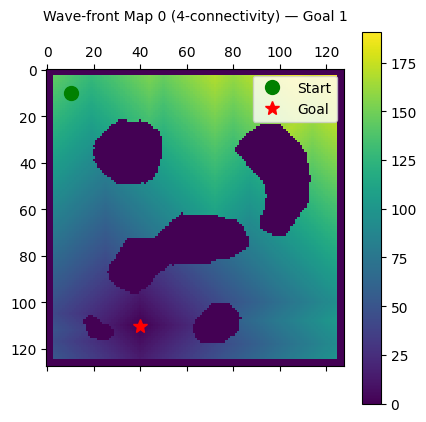

In [169]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Wave front map computation
grid_map_0_goal_1_wavefront_4_conn, grid_map_0_goal_1_wavefront_4_conn_visual = wave_front_planner(grid_map_0_first.copy(), goal, mode='4_point')

# Show grid map
plt.matshow(grid_map_0_goal_1_wavefront_4_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 0 (4-connectivity) — Goal 1', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

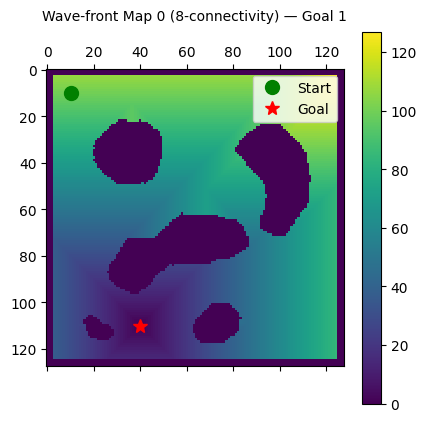

In [170]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Wave front map computation
grid_map_0_goal_1_wavefront_8_conn, grid_map_0_goal_1_wavefront_8_conn_visual = wave_front_planner(grid_map_0_first.copy(), goal, mode='8_point')

# Show grid map
plt.matshow(grid_map_0_goal_1_wavefront_8_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 0 (8-connectivity) — Goal 1', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 0 with second goal position

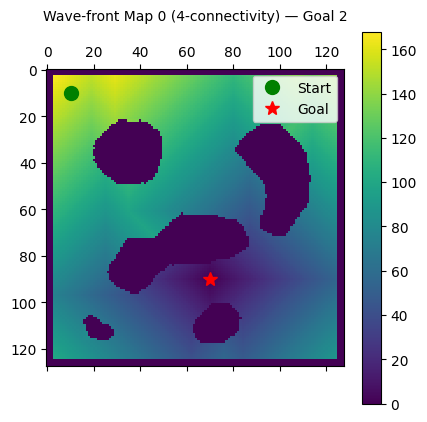

In [171]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Wave front map computation
grid_map_0_goal_2_wavefront_4_conn, grid_map_0_goal_2_wavefront_4_conn_visual = wave_front_planner(grid_map_0_first.copy(), goal, mode='4_point')

# Show grid map
plt.matshow(grid_map_0_goal_2_wavefront_4_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 0 (4-connectivity) — Goal 2', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

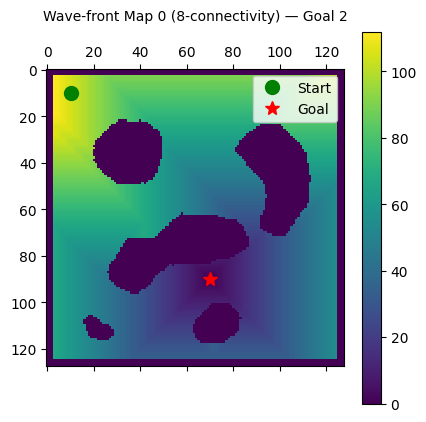

In [172]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Wave front map computation
grid_map_0_goal_2_wavefront_8_conn, grid_map_0_goal_2_wavefront_8_conn_visual = wave_front_planner(grid_map_0_first.copy(), goal, mode='8_point')

# Show grid map
plt.matshow(grid_map_0_goal_2_wavefront_8_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 0 (8-connectivity) — Goal 2', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 1

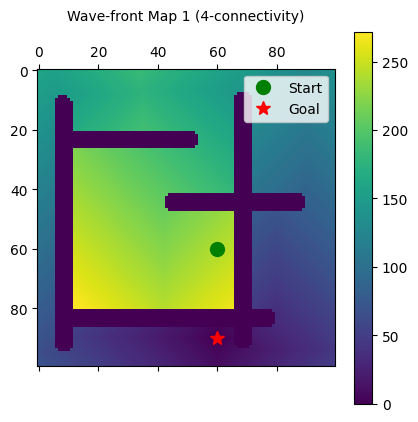

In [173]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Wave front map computation
grid_map_1_wavefront_4_conn, grid_map_1_wavefront_4_conn_visual = wave_front_planner(grid_map_1.copy(), goal, mode='4_point')

# Show grid map
plt.matshow(grid_map_1_wavefront_4_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 1 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

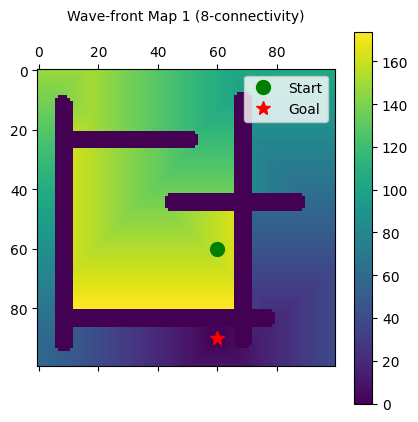

In [174]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Wave front map computation
grid_map_1_wavefront_8_conn, grid_map_1_wavefront_8_conn_visual = wave_front_planner(grid_map_1.copy(), goal, mode='8_point')

# Show grid map
plt.matshow(grid_map_1_wavefront_8_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 1 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 2

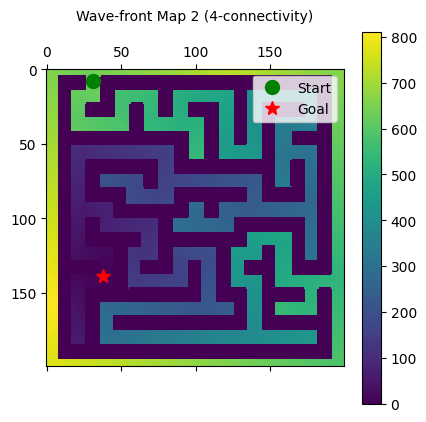

In [175]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Wave front map computation
grid_map_2_wavefront_4_conn, grid_map_2_wavefront_4_conn_visual = wave_front_planner(grid_map_2.copy(), goal, mode='4_point')

# Show grid map
plt.matshow(grid_map_2_wavefront_4_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 2 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

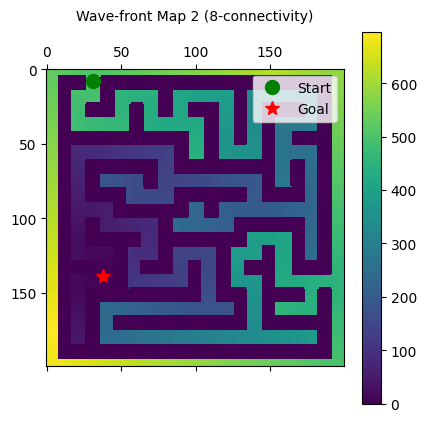

In [176]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Wave front map computation
grid_map_2_wavefront_8_conn, grid_map_2_wavefront_8_conn_visual = wave_front_planner(grid_map_2.copy(), goal, mode='8_point')

# Show grid map
plt.matshow(grid_map_2_wavefront_8_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 2 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 3

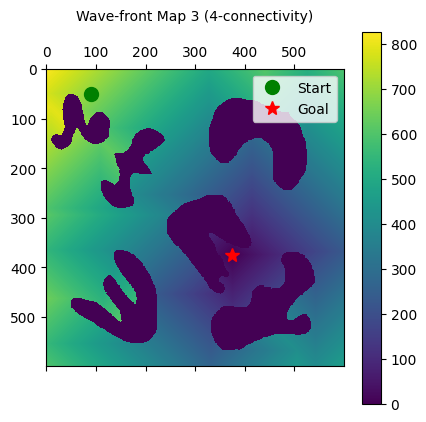

In [177]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Wave front map computation
grid_map_3_wavefront_4_conn, grid_map_3_wavefront_4_conn_visual = wave_front_planner(grid_map_3.copy(), goal, mode='4_point')

# Show grid map
plt.matshow(grid_map_3_wavefront_4_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 3 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

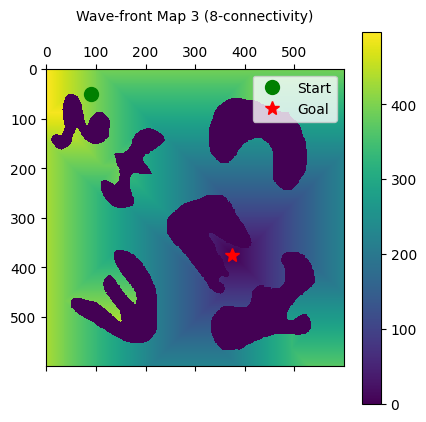

In [178]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Wave front map computation
grid_map_3_wavefront_8_conn, grid_map_3_wavefront_8_conn_visual = wave_front_planner(grid_map_3.copy(), goal, mode='8_point')

# Show grid map
plt.matshow(grid_map_3_wavefront_8_conn_visual)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.title('Wave-front Map 3 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

# Exercise 7: Greedy gradient descent

In [179]:
def greedy_gradient_descent(grid_map_wavefront, start, goal, mode):
    ## Input: 
    # grid_map_wavefront: 2D numpy array representing the distance to goal map
    # start: list or array representing the start point coordinates [x, y]
    # goal: list or array representing the goal point coordinates [x, y]
    # mode: string indicating the method to compute the wave front ('4_point', '8_point')
    ## Output:
    # trajectory_x: list of x coordinates representing the trajectory
    # trajectory_y: list of y coordinates representing the trajectory
    
    current = start
    trajectory_x = []
    trajectory_y = []
    trajectory_x.append(current[0])
    trajectory_y.append(current[1])


    if mode == '4_point':
        move_type = [[1, 0], [0, 1], [-1, 0], [0, -1]]
    elif mode == '8_point':
        move_type = [[1, 0], [1, 1], [-1, 1], [-1, -1], [0, 1], [0, -1], [-1, 0], [1, -1]]

    while (current[0] != goal[0] or current[1] != goal[1]):
        best_value = grid_map_wavefront[current[0]][current[1]]
        next_cell = current
        for move in move_type:
            if grid_map_wavefront[current[0] + move[0]][current[1] + move[1]] < best_value:
                best_value = grid_map_wavefront[current[0] + move[0]][current[1] + move[1]]
                next_cell = [current[0] + move[0], current[1] + move[1]]
        
        current = next_cell
        trajectory_x.append(current[0])
        trajectory_y.append(current[1])
    
    return trajectory_x, trajectory_y

#### Map 0 with first goal position

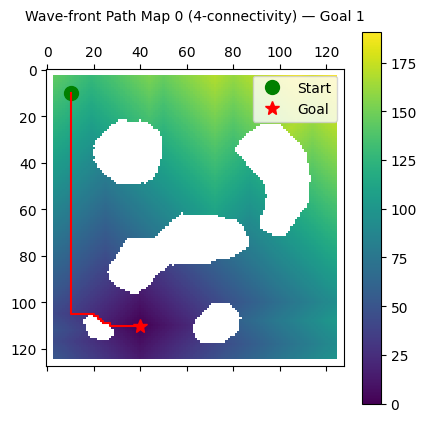

In [180]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Greedy gradient descent path planning
map_0_goal_1_trajectory_x_wavefront_4_conn, map_0_goal_1_trajectory_y_wavefront_4_conn = greedy_gradient_descent(grid_map_0_goal_1_wavefront_4_conn.copy(), start, goal, mode="4_point")

# Show grid map
plt.matshow(grid_map_0_goal_1_wavefront_4_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_1_trajectory_y_wavefront_4_conn, map_0_goal_1_trajectory_x_wavefront_4_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 0 (4-connectivity) — Goal 1', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

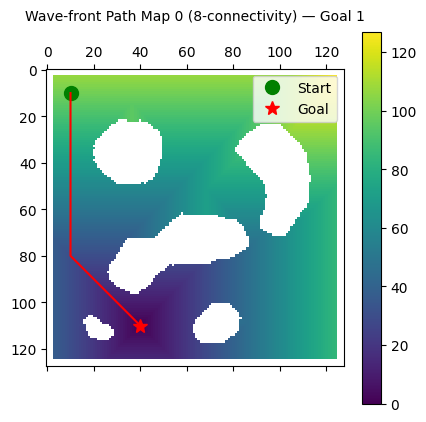

In [181]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_first_position'])

# Greedy gradient descent path planning
map_0_goal_1_trajectory_x_wavefront_8_conn, map_0_goal_1_trajectory_y_wavefront_8_conn = greedy_gradient_descent(grid_map_0_goal_1_wavefront_8_conn.copy(), start, goal, mode="8_point")

# Show grid map
plt.matshow(grid_map_0_goal_1_wavefront_8_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_1_trajectory_y_wavefront_8_conn, map_0_goal_1_trajectory_x_wavefront_8_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 0 (8-connectivity) — Goal 1', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 0 with second goal position

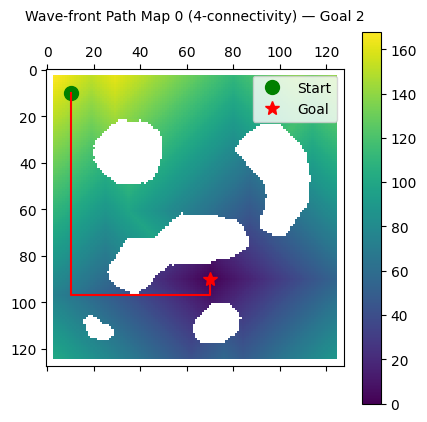

In [182]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Greedy gradient descent path planning
map_0_goal_2_trajectory_x_wavefront_4_conn, map_0_goal_2_trajectory_y_wavefront_4_conn = greedy_gradient_descent(grid_map_0_goal_2_wavefront_4_conn.copy(), start, goal, mode="4_point")

# Show grid map
plt.matshow(grid_map_0_goal_2_wavefront_4_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_2_trajectory_y_wavefront_4_conn, map_0_goal_2_trajectory_x_wavefront_4_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 0 (4-connectivity) — Goal 2', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

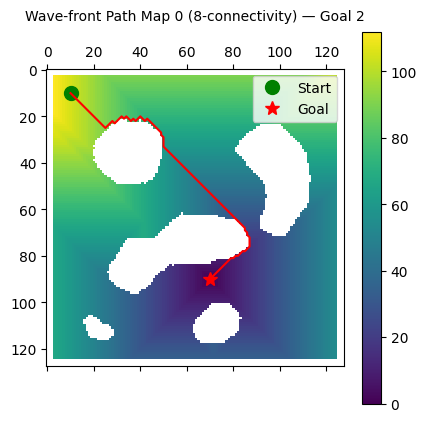

In [183]:
# Define map, start, and goal point
map_name = 'map_0'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name + '_second_position'])

# Greedy gradient descent path planning
map_0_goal_2_trajectory_x_wavefront_8_conn, map_0_goal_2_trajectory_y_wavefront_8_conn = greedy_gradient_descent(grid_map_0_goal_2_wavefront_8_conn.copy(), start, goal, mode="8_point")

# Show grid map
plt.matshow(grid_map_0_goal_2_wavefront_8_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_0_goal_2_trajectory_y_wavefront_8_conn, map_0_goal_2_trajectory_x_wavefront_8_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 0 (8-connectivity) — Goal 2', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 1

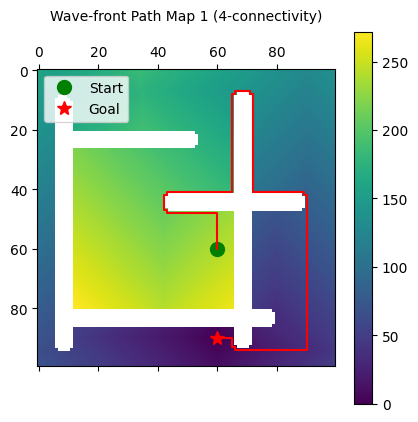

In [184]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Greedy gradient descent path planning
map_1_trajectory_x_wavefront_4_conn, map_1_trajectory_y_wavefront_4_conn = greedy_gradient_descent(grid_map_1_wavefront_4_conn.copy(), start, goal, mode="4_point")

# Show grid map
plt.matshow(grid_map_1_wavefront_4_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_1_trajectory_y_wavefront_4_conn, map_1_trajectory_x_wavefront_4_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 1 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

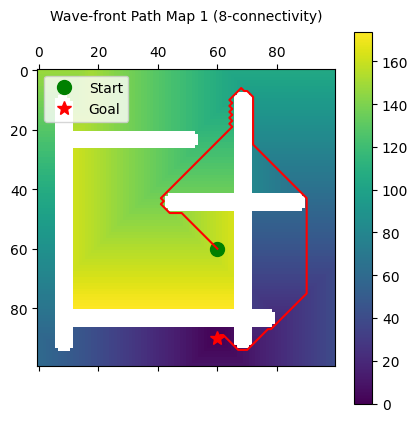

In [185]:
# Define map, start, and goal point
map_name = 'map_1'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Greedy gradient descent path planning
map_1_trajectory_x_wavefront_8_conn, map_1_trajectory_y_wavefront_8_conn = greedy_gradient_descent(grid_map_1_wavefront_8_conn.copy(), start, goal, mode="8_point")

# Show grid map
plt.matshow(grid_map_1_wavefront_8_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_1_trajectory_y_wavefront_8_conn, map_1_trajectory_x_wavefront_8_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 1 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 2

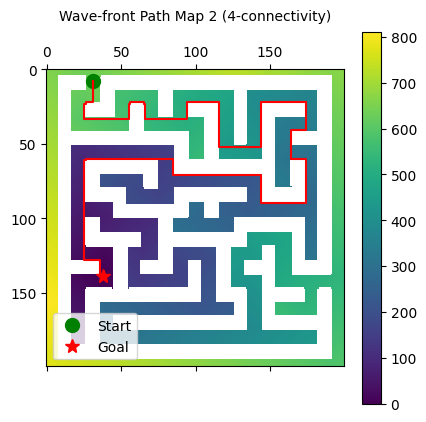

In [186]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Greedy gradient descent path planning
map_2_trajectory_x_wavefront_4_conn, map_2_trajectory_y_wavefront_4_conn = greedy_gradient_descent(grid_map_2_wavefront_4_conn.copy(), start, goal, mode="4_point")

# Show grid map
plt.matshow(grid_map_2_wavefront_4_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_2_trajectory_y_wavefront_4_conn, map_2_trajectory_x_wavefront_4_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 2 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

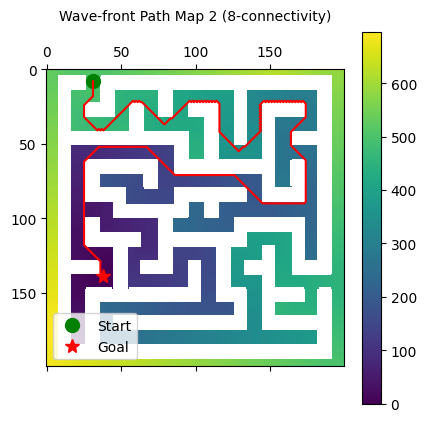

In [187]:
# Define map, start, and goal point
map_name = 'map_2'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Greedy gradient descent path planning
map_2_trajectory_x_wavefront_8_conn, map_2_trajectory_y_wavefront_8_conn = greedy_gradient_descent(grid_map_2_wavefront_8_conn.copy(), start, goal, mode="8_point")

# Show grid map
plt.matshow(grid_map_2_wavefront_8_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_2_trajectory_y_wavefront_8_conn, map_2_trajectory_x_wavefront_8_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 2 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

#### Map 3

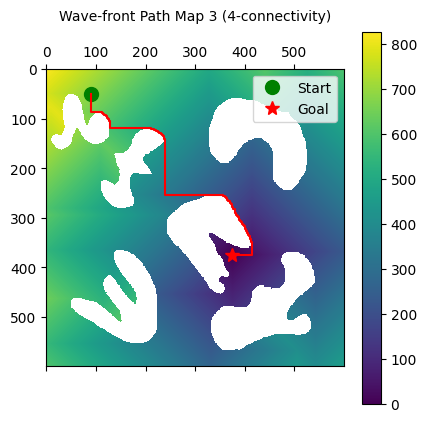

In [188]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Greedy gradient descent path planning
map_3_trajectory_x_wavefront_4_conn, map_3_trajectory_y_wavefront_4_conn = greedy_gradient_descent(grid_map_3_wavefront_4_conn.copy(), start, goal, mode="4_point")

# Show grid map
plt.matshow(grid_map_3_wavefront_4_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_3_trajectory_y_wavefront_4_conn, map_3_trajectory_x_wavefront_4_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 3 (4-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()

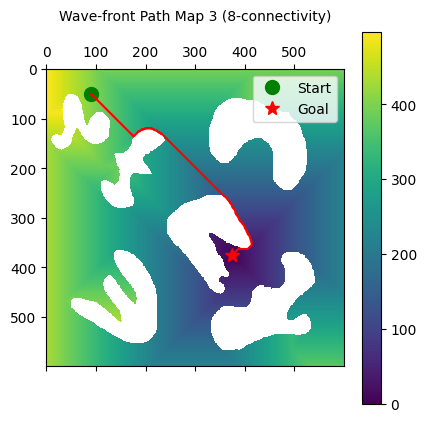

In [189]:
# Define map, start, and goal point
map_name = 'map_3'
start = np.array(starting_point[map_name])
goal = np.array(goal_point[map_name])

# Greedy gradient descent path planning
map_3_trajectory_x_wavefront_8_conn, map_3_trajectory_y_wavefront_8_conn = greedy_gradient_descent(grid_map_3_wavefront_8_conn.copy(), start, goal, mode="8_point")

# Show grid map
plt.matshow(grid_map_3_wavefront_8_conn)
plt.plot(start[1], start[0], 'go', markersize = 10, label = "Start")
plt.plot(goal[1], goal[0], 'r*', markersize = 10, label = "Goal")
plt.plot(map_3_trajectory_y_wavefront_8_conn, map_3_trajectory_x_wavefront_8_conn, 'r-', markersize = 10)
plt.title('Wave-front Path Map 3 (8-connectivity)', size = 10, pad=35)
plt.colorbar()
plt.legend()
plt.show()